Support Vector Machines

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import scipy as sp
import matplotlib.pyplot as pt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
from sklearn import neighbors
import matplotlib.patches as mpatches
from sklearn.tree import export_graphviz
%matplotlib inline


df=pd.read_csv("pnuemonia.csv",na_values=["Not Available"])
df.set_index('Provider Number', inplace=True)
df.fillna(0, inplace=True)
df.head(10)

,Hospital 30-Day Death (Mortality) Rates from Pneumonia,Comparison to U.S. Rate - Hospital 30-Day Death (Mortality) Rates from Pneumonia,Lower Mortality Estimate - Hospital 30-Day Death (Mortality) Rates from Pneumonia,Upper Mortality Estimate - Hospital 30-Day Death (Mortality) Rates from Pneumonia,Number of Patients - Hospital 30-Day Death (Mortality) Rates from Pneumonia,Hospital 30-Day Readmission Rates from Pneumonia,Comparison to U.S. Rate - Hospital 30-Day Readmission Rates from Pneumonia,Lower Readmission Estimate - Hospital 30-Day Readmission Rates from Pneumonia,Upper Readmission Estimate - Hospital 30-Day Readmission Rates from Pneumonia,Number of Patients - Hospital 30-Day Readmission Rates from Pneumonia
Provider Number,,,,,,,,,,
10001,10.9,No Different than U.S. National Rate,8.6,13.7,371.0,17.1,No Different than U.S. National Rate,14.4,20.4,400.0
10002,13.9,No Different than U.S. National Rate,11.3,17.0,372.0,17.6,No Different than U.S. National Rate,15.0,20.6,374.0
10003,13.4,No Different than U.S. National Rate,11.2,15.8,836.0,16.9,No Different than U.S. National Rate,14.7,19.5,842.0
10004,14.9,No Different than U.S. National Rate,11.6,19.0,239.0,19.4,No Different than U.S. National Rate,15.9,23.2,254.0
10005,15.8,No Different than U.S. National Rate,11.4,21.5,61.0,18.0,No Different than U.S. National Rate,14.0,22.8,56.0
10006,8.7,Better than U.S. National Rate,6.8,11.0,315.0,18.7,No Different than U.S. National Rate,15.7,22.2,326.0
10007,16.2,Worse than U.S. National Rate,13.4,19.6,441.0,17.7,No Different than U.S. National Rate,15.3,20.7,452.0
10008,15.8,Worse than U.S. National Rate,12.1,20.2,215.0,17.7,No Different than U.S. National Rate,14.4,21.8,210.0
10009,10.7,No Different than U.S. National Rate,8.2,13.6,318.0,16.9,No Different than U.S. National Rate,14.2,20.3,332.0


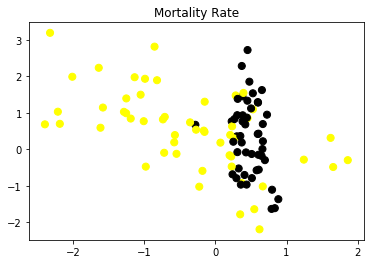

In [2]:
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

pt.figure()
pt.title('Mortality Rate')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
pt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)
pt.show()

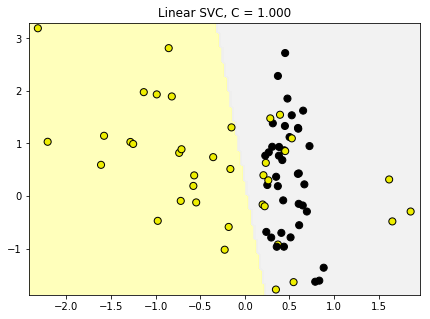

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = pt.subplots(1, 1, figsize=(7, 5))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)


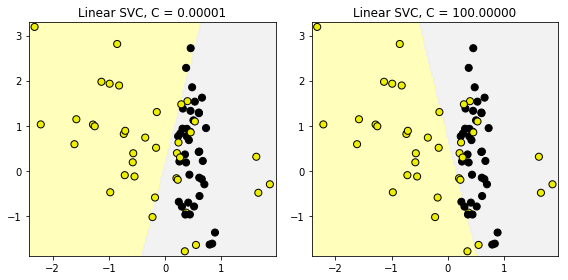

In [4]:
from sklearn.svm import LinearSVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = pt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
pt.tight_layout()

In [5]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Pnuemonia dataset')
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Pnuemonia dataset
Accuracy of Linear SVC classifier on training set: 0.81
Accuracy of Linear SVC classifier on test set: 0.84


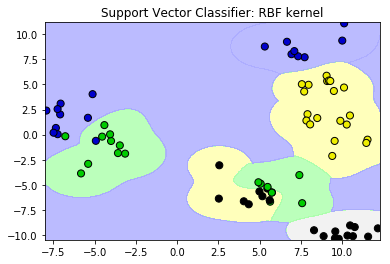

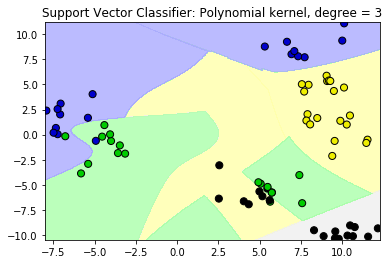

In [6]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')


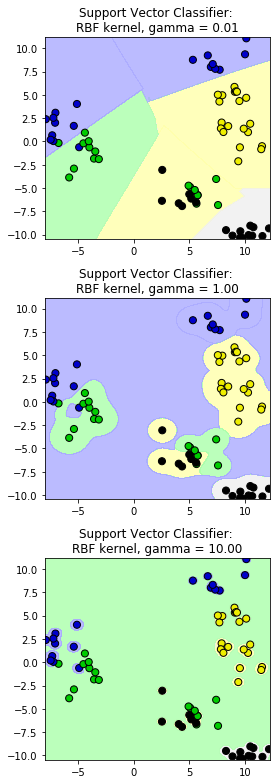

In [7]:
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = pt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    pt.tight_layout()

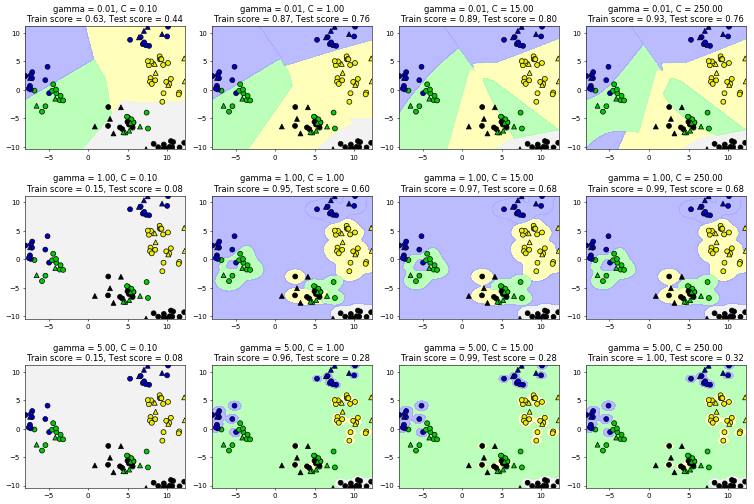

In [8]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = pt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        pt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Pnuemonia dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Pnuemonia dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.85
Accuracy of RBF-kernel SVC on test set: 0.84


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Pnuemonia dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Pnuemonia dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.80
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.76


In [11]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,random_state = 0)


svm = SVC(kernel='linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('Support vector machine classifier (linear kernel, C=1)\n', confusion)

Support vector machine classifier (linear kernel, C=1)
 [[10  5]
 [ 1  9]]


gamma = 0.01  accuracy = 0.72   AUC = 0.77
gamma = 0.10  accuracy = 0.76   AUC = 0.83
gamma = 0.20  accuracy = 0.76   AUC = 0.84
gamma = 1.00  accuracy = 0.88   AUC = 0.90


C:\Users\rdhakar\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


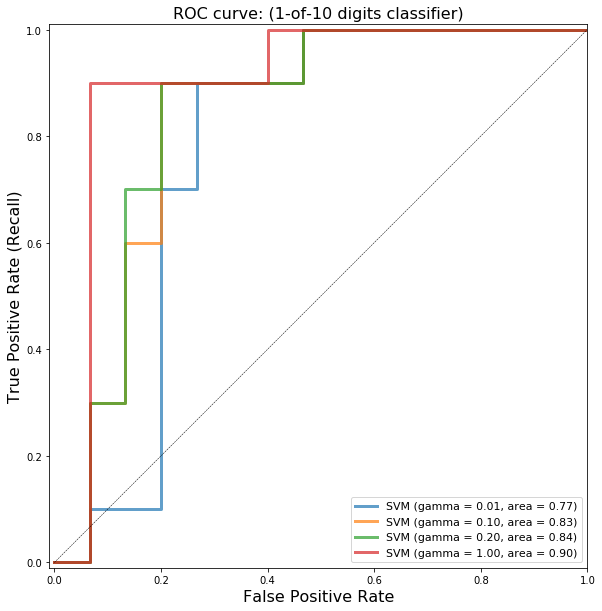

In [12]:
from matplotlib import cm
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import matplotlib.pyplot as pt

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,n_redundant=0, n_informative=2,
                                 n_clusters_per_class=1, flip_y = 0.1,class_sep = 0.5, random_state=0)


X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

pt.figure(figsize=(20,10))
pt.xlim([-0.01, 1.00])
pt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, roc_auc_svm))
    pt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7,label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

pt.xlabel('False Positive Rate', fontsize=16)
pt.ylabel('True Positive Rate (Recall)', fontsize=16)
pt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
pt.legend(loc="best", fontsize=11)
pt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
pt.axes().set_aspect('equal')

pt.show()